# Figure 2: Validation of the colocation of RiverAtlas and WHONDRS data

RiverAltas and WHONDRS S19S both have stream order at each site. Checking the relationship between the stream order values at each site is one way of checking that the colocation of RiverAtlas river segments matches the WHONDRS sites.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set all font sizes in the plots
font = {'family' : 'sans',
        'style'  : 'normal',
        'weight' : 'normal',
        'size'   : 20}

mpl.rc('font', **font)

pd.set_option('display.max_rows', 500)

## Load and preprocess data

In [2]:
# Load data
colocated_df = pd.read_csv('WHONDRS_S19S_colocated_for_verification.csv')

# Replace any missing (empty string) with NaN
colocated_df.replace(' ',np.NaN,inplace=True)

# Remove any missing data
colocated_df.dropna(axis=0,subset=['WH_SO','RA_SO'],how='any',inplace=True)

# Convert from strings to numbers
colocated_df['WH_SO'] = colocated_df['WH_SO'].astype(int)
colocated_df['RA_SO'] = colocated_df['RA_SO'].astype(int)

colocated_df['my_lm'] = colocated_df['my_lm'].astype(float)
colocated_df['RA_lm'] = colocated_df['RA_lm'].astype(float)

# Set site ID as Pandas index
colocated_df.set_index('WH_ID', inplace=True)

In [3]:
# Pull out the two outlier sites
S19S_0022 = colocated_df.loc['S19S_0022',:]
S19S_0060 = colocated_df.loc['S19S_0060',:]
drop_null = colocated_df.drop('S19S_0022', inplace=True)
drop_null = colocated_df.drop('S19S_0060', inplace=True)

## Determine line of best fit and correlation between stream order values

In [4]:
# Compute line of best fit between testing and training targets
best_fit_line = np.polynomial.polynomial.Polynomial.fit(
    np.squeeze(colocated_df['WH_SO']),
    np.squeeze(colocated_df['RA_SO']),1)
plot_best_fit_line = best_fit_line.linspace(n=100,domain=[colocated_df['WH_SO'].min(),colocated_df['WH_SO'].max()])

In [5]:
# The correlation matrix includes self correlations (1), so pick out
# the single cross-correlation value.
r = np.corrcoef(colocated_df['WH_SO'],colocated_df['RA_SO'])[1,0]
r2 = r*r
print(r2)

0.8715435879267965


## Plot stream order values

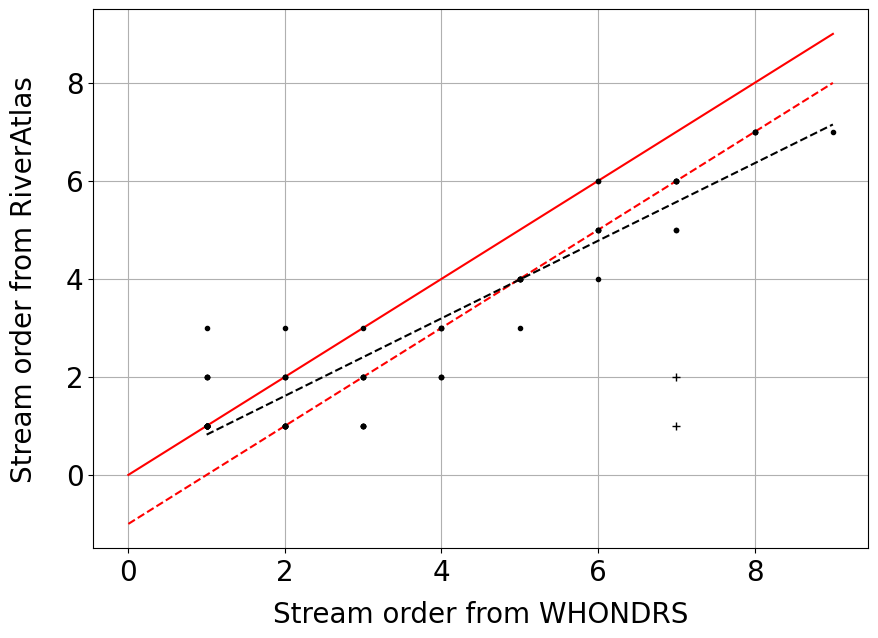

In [6]:
#fig, [ax0,ax1] = plt.subplots(1,2,figsize=(10,10))
fig, ax0 = plt.subplots(1,1,figsize=(10,7))

ax0.plot([0,9],[0,9],'r')
ax0.plot([0,9],[-1,8],'r--')
ax0.plot(plot_best_fit_line[0],plot_best_fit_line[1],'k--')
ax0.plot(colocated_df['WH_SO'],colocated_df['RA_SO'],'k.')
ax0.plot(S19S_0022['WH_SO'],S19S_0022['RA_SO'],'k+')
ax0.plot(S19S_0060['WH_SO'],S19S_0060['RA_SO'],'k+')
ax0.grid()

ax0.set_xlabel('Stream order from WHONDRS', labelpad=10)
ax0.set_ylabel('Stream order from RiverAtlas', labelpad=20)

#ax1.plot([0,18],[0,18],'r')
#ax1.plot(colocated_df['my_lm']/1000,colocated_df['RA_lm'],'k.')
#ax1.grid()
#
#ax1.set_xlabel('River segment length computed from coordinates (km)')
#ax1.set_ylabel('River segment length reported in RiverAtlas (km)')

plt.savefig('fig02_colocation_validation.pdf')